In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
loading the dataset in chunks
"""
# def load_csv(csv_file,c_size,colname):
#     df ={}
#     for chunk in pd.read_csv(csv_file,chunksize =c_size):
#         for entry in chunk[colname]:
#             if entry in df.keys():
#                 df[entry] +=1
#             else:
#                 df[entry] =1
#         return df
# df_final = load_csv('fulfilment_center_info.csv',47,'region_code')
# print(df_final)    
df = pd.read_csv('fulfilment_center_info.csv')
df

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [3]:
print(df.shape)


(77, 5)


In [4]:
print("the dataset contains a total of :" + str(len(df.index))+"entries")


the dataset contains a total of :77entries


# Data cleaning

In [5]:
# checking missing values
df.duplicated().any()


False

In [6]:
df.isnull()

,center_id,city_code,region_code,center_type,op_area
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
72,False,False,False,False,False
73,False,False,False,False,False
74,False,False,False,False,False
75,False,False,False,False,False


We can conclude that there are no missing or null values in the dataset

# Data visualization

<AxesSubplot:xlabel='op_area', ylabel='count'>

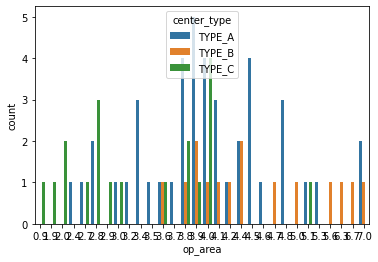

In [7]:
sns.countplot(x ='op_area',hue ="center_type", data =df)

In [8]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


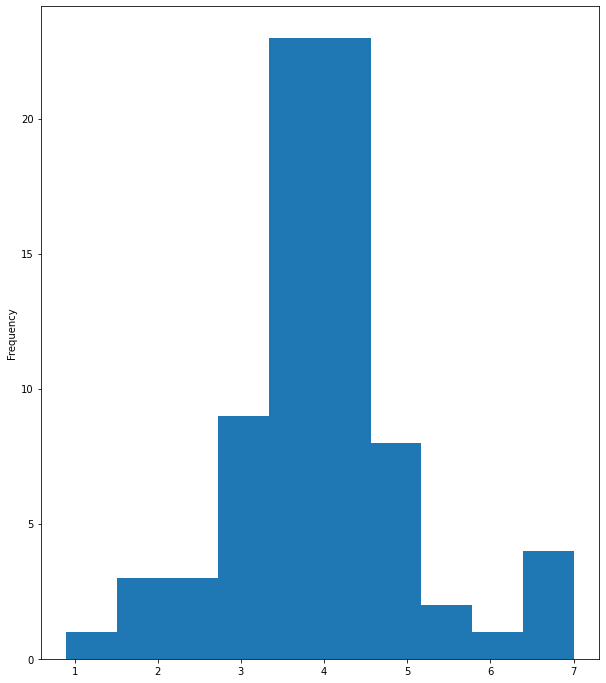

In [9]:
hist = df['op_area'].plot.hist(bins =10,figsize =(10,12))

<AxesSubplot:title={'center':'graph of operational area against city code'}, xlabel='operational area', ylabel='city code'>

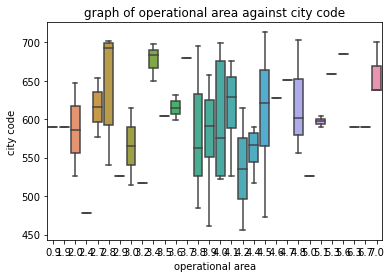

In [10]:
x =sns.boxplot(x = 'op_area', y ='city_code', data =df)
plt.ylabel('city code')
plt.xlabel('operational area')
plt.title('graph of operational area against city code')
x

In [11]:
COT =(df.mean(),df.median(),df.mode())
COT

(center_id       83.142857
 city_code      600.662338
 region_code     56.493506
 op_area          3.985714
 dtype: float64,
 center_id       77.0
 city_code      596.0
 region_code     56.0
 op_area          3.9
 dtype: float64,
     center_id  city_code  region_code center_type  op_area
 0          10      590.0         56.0      TYPE_A      4.0
 1          11        NaN          NaN         NaN      NaN
 2          13        NaN          NaN         NaN      NaN
 3          14        NaN          NaN         NaN      NaN
 4          17        NaN          NaN         NaN      NaN
 ..        ...        ...          ...         ...      ...
 72        161        NaN          NaN         NaN      NaN
 73        162        NaN          NaN         NaN      NaN
 74        174        NaN          NaN         NaN      NaN
 75        177        NaN          NaN         NaN      NaN
 76        186        NaN          NaN         NaN      NaN
 
 [77 rows x 5 columns])

In [12]:
dummForType = pd.get_dummies(df['center_type'],drop_first =True)
dummForType
       

,TYPE_B,TYPE_C
0,0,0
1,1,0
2,0,1
3,0,0
4,0,1
...,...,...
72,0,0
73,0,0
74,0,0
75,1,0


In [13]:
fd = pd.concat([df,dummForType], axis =1)
fd

,center_id,city_code,region_code,center_type,op_area,TYPE_B,TYPE_C
0,11,679,56,TYPE_A,3.7,0,0
1,13,590,56,TYPE_B,6.7,1,0
2,124,590,56,TYPE_C,4.0,0,1
3,66,648,34,TYPE_A,4.1,0,0
4,94,632,34,TYPE_C,3.6,0,1
...,...,...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8,0,0
73,30,604,56,TYPE_A,3.5,0,0
74,76,614,85,TYPE_A,3.0,0,0
75,68,676,34,TYPE_B,4.1,1,0


In [16]:
fd


,center_id,city_code,region_code,op_area,TYPE_B,TYPE_C
0,11,679,56,3.7,0,0
1,13,590,56,6.7,1,0
2,124,590,56,4.0,0,1
3,66,648,34,4.1,0,0
4,94,632,34,3.6,0,1
...,...,...,...,...,...,...
72,53,590,56,3.8,0,0
73,30,604,56,3.5,0,0
74,76,614,85,3.0,0,0
75,68,676,34,4.1,1,0


In [71]:
X= fd.drop('region_code', axis =1)
y = fd["region_code"]

In [72]:
from sklearn.model_selection import train_test_split


# Train Data

In [73]:
X_train, X_test,y_train, y_test =train_test_split(X,y, test_size = 0.3,random_state =1)


In [74]:
from sklearn.linear_model import LogisticRegression


In [75]:
logModel = LogisticRegression(max_iter=47)


In [76]:
logModel.fit(X_train, y_train)


E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=47)

In [77]:
predictions = logModel.predict(X_test)


In [78]:
from sklearn.metrics import classification_report


In [79]:
classification_report(y_test, predictions)


E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n          34       0.30      0.50      0.37         6\n          56       0.57      0.62      0.59        13\n          77       0.00      0.00      0.00         3\n          85       0.00      0.00      0.00         2\n\n    accuracy                           0.46        24\n   macro avg       0.22      0.28      0.24        24\nweighted avg       0.38      0.46      0.41        24\n'

In [80]:
from sklearn.metrics import confusion_matrix


In [81]:
confusion_matrix(y_test,predictions)


array([[3, 3, 0, 0],
       [5, 8, 0, 0],
       [1, 2, 0, 0],
       [1, 1, 0, 0]], dtype=int64)

In [82]:
from sklearn.metrics  import accuracy_score


In [83]:
accuracy_score(y_test,predictions)


0.4583333333333333